##### 1. Import Library

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import plot_model
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install rarfile

##### 2. Load Dataset

In [4]:
import rarfile

dataset_path = '/content/drive/MyDrive/MachineLearning/UAP/Klasifikasi Transportasi Udara.rar'

with rarfile.RarFile(dataset_path, 'r') as rar_ref:
    rar_ref.extractall('/content/dataset')

dataset_folder = '/content/dataset/Klasifikasi Transportasi Udara'

##### 3. EDA (Exploratory Data Analysis)

###### a. Cek distribusi label

In [5]:
labels = os.listdir(dataset_folder)
print("Classes/Labels:", labels)

Classes/Labels: ['pesawat komersial', 'pesawat jet militer', 'helikopter', 'pesawat kargo']


###### b.jumlah gambar di setiap label

In [6]:
label_counts = {label: len(os.listdir(os.path.join(dataset_folder, label))) for label in labels}
print("Image Distribution per Class:", label_counts)

Image Distribution per Class: {'pesawat komersial': 2905, 'pesawat jet militer': 2900, 'helikopter': 2387, 'pesawat kargo': 1891}


###### c. Visualisasi distribusi data

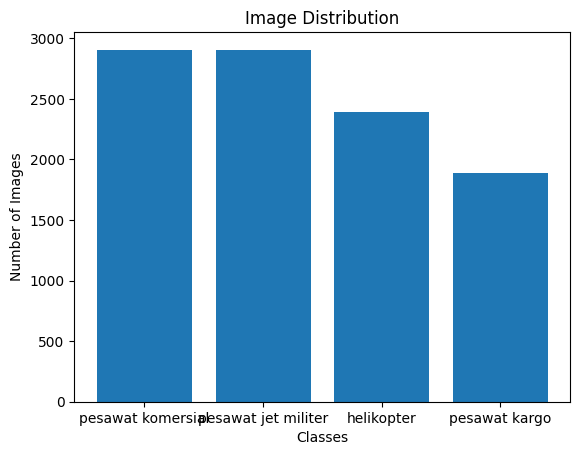

In [7]:
plt.bar(label_counts.keys(), label_counts.values())
plt.title("Image Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

###### d.Menampilkan contoh gambar dari setiap label

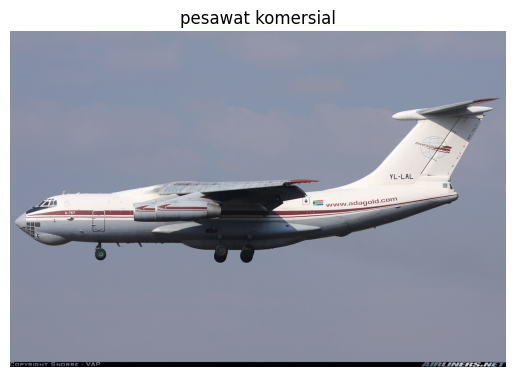

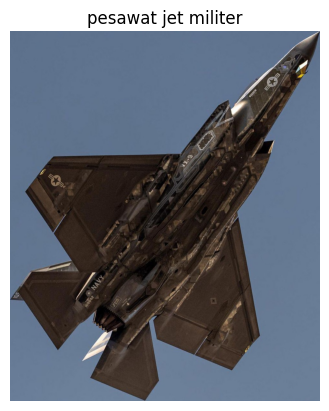

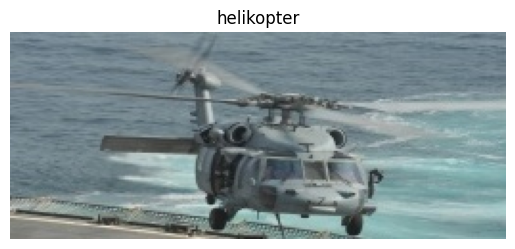

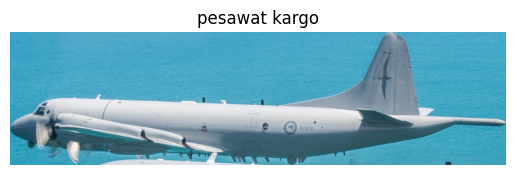

In [8]:
for label in labels:
    sample_image_path = os.path.join(dataset_folder, label, os.listdir(os.path.join(dataset_folder, label))[0])
    sample_image = plt.imread(sample_image_path)
    plt.imshow(sample_image)
    plt.title(label)
    plt.axis('off')
    plt.show()

##### 4. Preprocessing

In [9]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 8067 images belonging to 4 classes.
Found 2016 images belonging to 4 classes.


##### 5. Model CNN

In [10]:
input_shape = (128, 128, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

##### 6. Pelatihan Model

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


253/253 ━━━━━━━━━━━━━━━━━━━━ 106s 384ms/step - accuracy: 0.5844 - loss: 0.9557 - val_accuracy: 0.7455 - val_loss: 0.5486
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 136s 380ms/step - accuracy: 0.7829 - loss: 0.5168 - val_accuracy: 0.7827 - val_loss: 0.4857
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 97s 379ms/step - accuracy: 0.8356 - loss: 0.4182 - val_accuracy: 0.7832 - val_loss: 0.4700
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 140s 364ms/step - accuracy: 0.8663 - loss: 0.3337 - val_accuracy: 0.8165 - val_loss: 0.4252
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 96s 373ms/step - accuracy: 0.9047 - loss: 0.2534 - val_accuracy: 0.8199 - val_loss: 0.4347
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 96s 371ms/step - accuracy: 0.9014 - loss: 0.2445 - val_accuracy: 0.8209 - val_loss: 0.5000
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 141s 372ms/step - accuracy: 0.9300 - loss: 0.1892 - val_accuracy: 0.8279 - val_loss: 0.4280
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 95s 369ms/step - accuracy: 0.9420 - loss: 0.1493 -

###### a.  menyimpan model ke file .h5

In [12]:
model_save_path = '/content/drive/MyDrive/MachineLearning/UAP/model_klasifikasi_transportasi_cnn.h5'
model.save(model_save_path)
print(f"Model telah disimpan di: {model_save_path}")

Model telah disimpan di: /content/drive/MyDrive/MachineLearning/UAP/model_klasifikasi_transportasi_cnn.h5


##### 7. Evaluasi Model

###### a. Plot akurasi dan loss

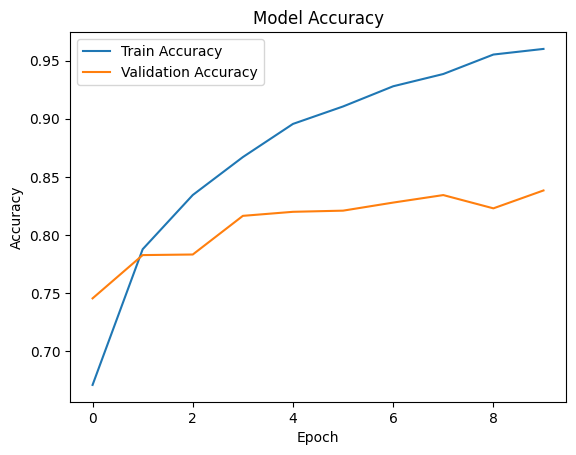

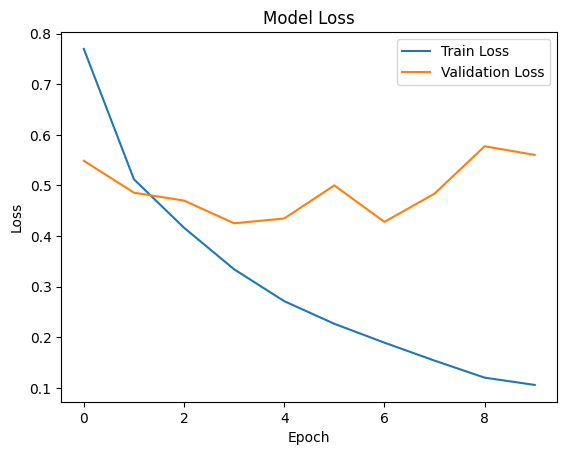

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###### b. Classification Report

In [14]:
val_generator.reset()
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)
print(classification_report(y_true, y_pred, target_names=labels))

63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step
                     precision    recall  f1-score   support

  pesawat komersial       0.22      0.26      0.24       477
pesawat jet militer       0.29      0.31      0.30       580
         helikopter       0.24      0.16      0.20       378
      pesawat kargo       0.28      0.28      0.28       581

           accuracy                           0.26      2016
          macro avg       0.26      0.25      0.25      2016
       weighted avg       0.26      0.26      0.26      2016



###### c. 8. Memilih 4 Gambar Secara Acak dari Data Uji

In [15]:
test_images, test_labels = next(val_generator)
random_indices = random.sample(range(len(test_images)), 4)
selected_images = [test_images[i] for i in random_indices]
selected_labels = [test_labels[i] for i in random_indices]


###### d. 9. Prediksi Menggunakan Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


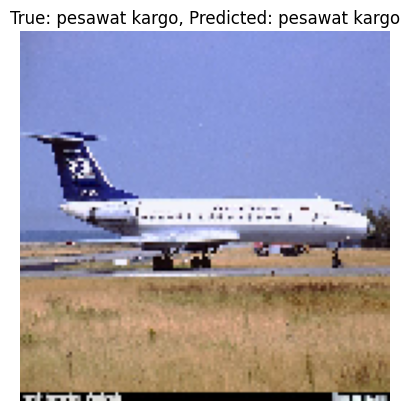

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


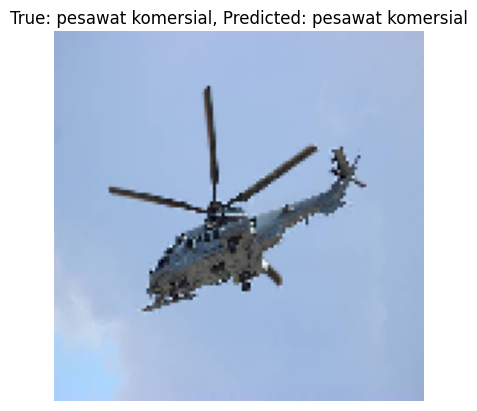

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


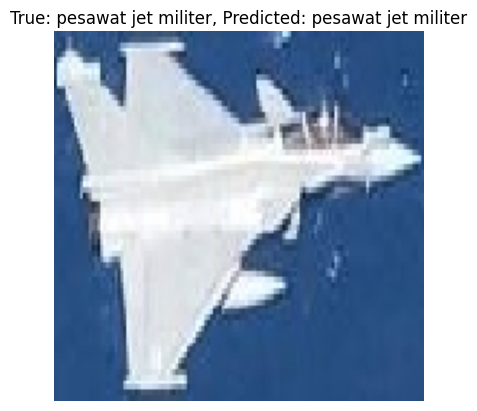

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


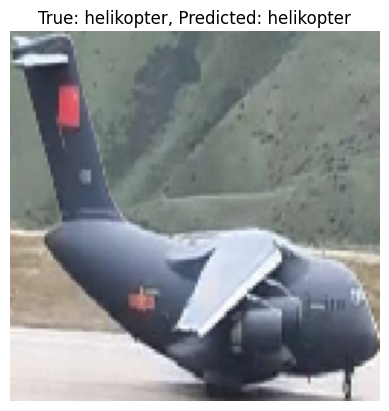

In [16]:
for i, image in enumerate(selected_images):
    prediction = model.predict(image[np.newaxis, ...])
    predicted_label = labels[np.argmax(prediction)]
    true_label = labels[np.argmax(selected_labels[i])]

    plt.imshow(image)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()